In [1]:
import numpy as np
import matplotlib.pyplot as pt
import numpy.linalg as la
import scipy.sparse.linalg as lin
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [68]:
# dimension of solution vector
N=30
location=np.zeros((N,N))

for i in range(0,N):      # label the position of each element in matrix
    for j in range(0,N):
        location[i,j]=j+N*i 

In [69]:
def matrix_to_index(a,b): # get index from matrix(i,j)
    return int(location[a,b])

def index_to_i(a):        # find x_coord of 'a' in matrix
    ind_1=np.where(location==a)[0][0]
    return ind_1

def index_to_j(a):        # find y_coord of 'a' in matrix
    ind_1=np.where(location==a)[1][0]
    return ind_1

In [70]:
# define boundary of solving equation by setting grids in domain to 1. 
# examples:
# 1) square
indomain=np.ones((N+2,N+2))
indomain[0]=0
indomain[len(indomain)-1]=0
indomain[:,0]=0
indomain[:,len(indomain)-1]=0

# 2) disk
indomain=np.zeros((N+2,N+2))
for i in range(N):
    for j in range(N):
        if np.sqrt((i-N/2)**2+(j-N/2)**2)<N/2:
            indomain[i,j]=1
            
# if a coordinate is in the domain of solution? 
def if_in_domain(a,b): # if in: 1 ; if not: 0
    return int(indomain[a+1,b+1])

In [71]:
# constructing Hamiltonian
# after simplification: -4 u_i,j + u_i,j+1 + u_i,j-1 + u_i+1,j + u_i-1,j

H=np.zeros((N**2,N**2))

for i in range(0,N**2):
    x=index_to_i(i)
    y=index_to_j(i)
    
    if if_in_domain(x,y)==1: # check every time if it is in domain
        H[i, matrix_to_index(x,y)] = -4
        
    if if_in_domain(x-1,y)==1:
        H[i, matrix_to_index(x-1,y)] = 1
        
    if if_in_domain(x+1,y)==1:
        H[i, matrix_to_index(x+1,y)] = 1
        
    if if_in_domain(x,y+1)==1:
        H[i, matrix_to_index(x,y+1)] = 1
        
    if if_in_domain(x,y-1)==1:
        H[i, matrix_to_index(x,y-1)] = 1
        
vals, vec = lin.eigsh(H,k=20,which='SA')

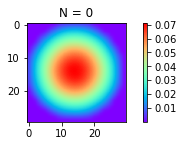

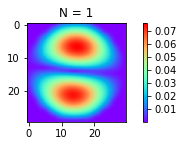

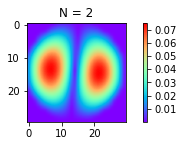

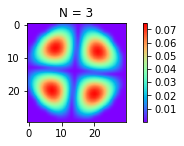

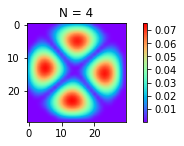

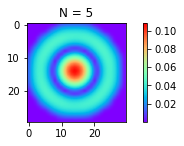

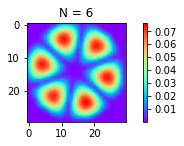

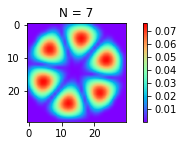

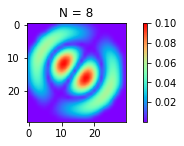

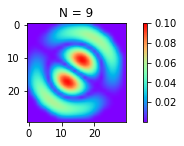

In [72]:
# plotting different modes of excitations
# eigenvectors are extracted by COLUMNS: la.eigh(H)[0][:,i] 

pt.figure()
for j in range(0,10):
    eig=vec[:,j]
    solu=np.zeros((N,N))
    
    for i in range(0,len(eig)):
        solu[index_to_i(i),index_to_j(i)]=eig[i]
        
    pt.subplot(211)
    pt.imshow(abs(solu),cmap='rainbow',interpolation='gaussian')
    pt.title('N = '+str(j))
    pt.colorbar()
    pt.show()